In [34]:
import pandas as pd
import numpy as np
data = pd.read_csv('/home/jefferyjapheth/Desktop/devsuite/hello_ds/data/external/titanic3.csv')

In [35]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

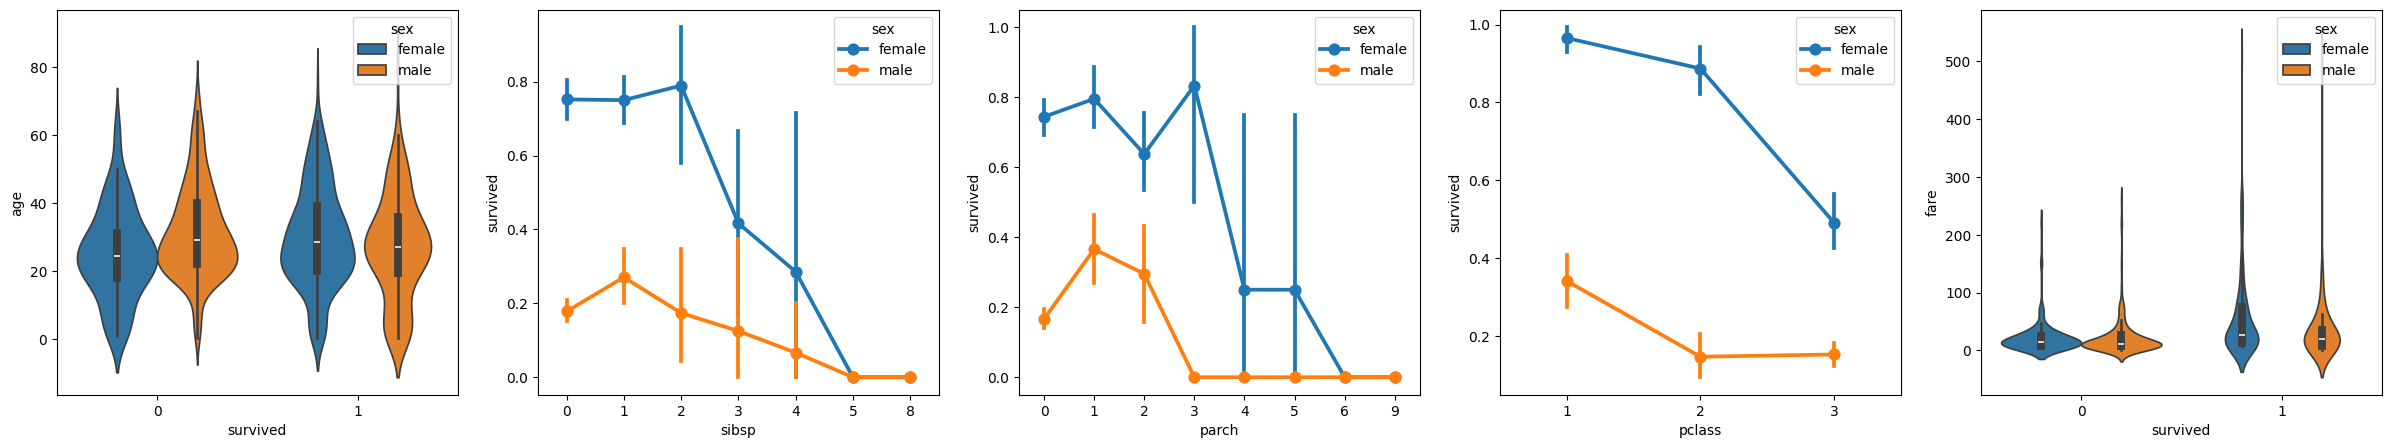

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [37]:
data.replace({'male': 1, 'female': 0}, inplace=True)


In [38]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [39]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [40]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [45]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))


0.7464114832535885


In [48]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [49]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [50]:
model.summary()
#this is model summary

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.7978
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.7978
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7978
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7943
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7931
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7955
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7955
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7955
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7967
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7967
Epoch 11/50
27/27 [

In [58]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))


7/7 [==============================] - 0s 1ms/step
0.8038277511961722
